## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


##**Part 1: Linear Regression:**  **(25 marks)**


1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [120]:
#Reference: https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
#https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns
#https://stackoverflow.com/questions/38481409/pandas-deleting-row-with-df-drop-doesnt-work
#https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

import pandas as pd

#Read the weather data as a dataframe as df_weather
df_weather = pd.read_csv('weather_dataset.csv')
#drop null values 
df_weather.dropna()

#converting the format of recorded date and time 
df_weather['recording_date_time']= pd.to_datetime(df_weather['recording_date_time']) 


df_weather['new_date'] = [d.date() for d in df_weather['recording_date_time']]

#df_weather.set_index(['new_date'])

#df_weather['new_date']= pd.to_datetime(df_weather['new_date'])

#Creates a new column names year 

df_weather['year'] = pd.DatetimeIndex(df_weather['new_date']).year

df_weather = df_weather.drop(['new_date','recording_date_time'],axis = 1)


df_test = df_weather.loc[(df_weather['year'] >= 2015) & (df_weather['year'] <= 2016)]
df_train = df_weather.loc[(df_weather['year'] >= 2006) & (df_weather['year'] <= 2014)]


#The shape of test and train data
print('testing data shape:', df_test.shape)
print('training data shape:', df_train.shape)
#df_train

#The shapes are inclusive of the year column 

testing data shape: (17544, 10)
training data shape: (78909, 10)


,precip_type,temperature,apparent_temperature,humidity,wind_speed,wind_bearing,visibility,cloud_cover,pressure,year
0,rain,9.47,7.39,0.89,14.12,251,15.83,0,1015.13,2006
1,rain,9.36,7.23,0.86,14.26,259,15.83,0,1015.63,2006
2,rain,9.38,9.38,0.89,3.93,204,14.96,0,1015.94,2006
3,rain,8.29,5.94,0.83,14.10,269,15.83,0,1016.41,2006
4,rain,8.76,6.98,0.83,11.04,259,15.83,0,1016.51,2006
...,...,...,...,...,...,...,...,...,...,...
78904,rain,21.23,21.23,0.72,3.08,250,10.26,0,1014.11,2014
78905,rain,19.22,19.22,0.82,0.23,290,10.22,0,1014.73,2014
78906,rain,17.29,17.29,0.87,3.22,200,16.05,0,1015.00,2014
78907,rain,16.69,16.69,0.87,0.00,0,15.13,0,1015.21,2014


2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings. **(5 marks)**
<br/><font color='green'>**[Hint for students: See the "7.3 Relevance and Covariance among features or variables" for more information.]** <font/>

In [122]:
'''
Reference:https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

'''

import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder 

#setting temperature as y variable and storing it as y_train
y_train = df_train['temperature']


df_weather['precip_type'].unique() #rain/snow

#initializing an object of class LabelEncoder
labelencoder= LabelEncoder() 
df_train['precip_type'] = labelencoder.fit_transform(df_train['precip_type'])
df_train.head()

#defining x_train with the possible features for predicting temperature 
features_col = ['precip_type', 'humidity', 'wind_speed','wind_bearing','visibility', 'cloud_cover', 'pressure', 'apparent_temperature']
x_train = df_train[features_col]



print('Pearson correlation between precipitation type and temperature', stats.pearsonr(x_train['precip_type'],y_train))
print('Pearson correlation between humidity and temperature', stats.pearsonr(x_train['humidity'],y_train))
print('Pearson correlation between wind speed and temperature', stats.pearsonr(x_train['wind_speed'],y_train))
print('Pearson correlation between wind bearing and temperature', stats.pearsonr(x_train['wind_bearing'],y_train))
print('Pearson correlation between visibility and temperature', stats.pearsonr(x_train['visibility'],y_train))
print('Pearson correlation between cloud cover and temperature', stats.pearsonr(x_train['cloud_cover'],y_train))
print('Pearson correlation between pressure and temperature', stats.pearsonr(x_train['pressure'],y_train))
print('Pearson correlation between apparent temperature and temperature', stats.pearsonr(x_train['apparent_temperature'],y_train))

'''
Pearson correlation has a value between +1 and −1 where 1 indicates total positive linear correlation, 
0 is no linear correlation, and −1 shows total negative linear correlation.More than 0.5 is a strong relationsip, 
+/- signs represent either positive or negative relationship
humidity and precipitation have strong negative relationship
wind speed and wind bearing have almost zero relationship
Apparent temperature has a very strong positive relationship with temperature, visibility has a positive 
relationship with temperature but it is not strong as it is's coefficient is below 0.5

Therefore the insignificant features are wind_speed, wind_bearing,cloud cover, visibility and pressure
'''

#selecting only the significant features from the list of features
features = ['precip_type', 'humidity', 'apparent_temperature']
#selecting only the significant features as x_train
x_train = x_train[features]


['rain' 'snow']
Pearson correlation between precipitation type and temperature (-0.5783945936557476, 0.0)
Pearson correlation between humidity and temperature (-0.6316348195850396, 0.0)
Pearson correlation between wind speed and temperature (0.010945498975510361, 0.002107033107880756)
Pearson correlation between wind bearing and temperature (0.029771023758958636, 6.030691705702169e-17)
Pearson correlation between visibility and temperature (0.37115355299518865, 0.0)
Pearson correlation between cloud cover and temperature (nan, nan)
Pearson correlation between pressure and temperature (-0.010479972997426043, 0.0032406619314269175)
Pearson correlation between apparent temperature and temperature (0.9924134287248878, 0.0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model. **(5 marks)**

In [109]:
from sklearn.linear_model import LinearRegression as LR
import sklearn.metrics as skm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

#Creating an instanc eof the linearregression model as LR
my_model = LR(normalize = True)
my_model.fit(x_train, y_train)


#defining the x_test and y_test inorder to measure the accuracy and model performance 
y_test = df_test['temperature']
#label encoding the precipitation
df_test['precip_type'] = labelencoder.fit_transform(df_test['precip_type'])
print(df_test.unique())
x_test = df_test[features]

#making predictions for x_train
prediction_train = my_model.predict(x_train)

#Predicting for x_test
prediction_test = my_model.predict(x_test)




print('____MSE for prediction using train data______')
mse = np.mean((prediction_train - y_train)**2)
print('MSE : {}'.format(mse))

print('The mean absolute error: ',mean_absolute_error(y_train,prediction_train))

mse = np.mean((prediction_train - y_train)**2)
error = skm.mean_squared_error(y_train,prediction_train)
print('Error : {}'.format(error))


print('____MSE for prediction using test data______')

mse = np.mean((prediction_test - y_test)**2)
print('MSE : {}'.format(mse))

error = skm.mean_squared_error(y_test,prediction_test)
print('Error : {}'.format(error))

print('the mean absolute error: ',mean_absolute_error(y_test,prediction_test))


'''

The mean ansolute error and error values are calculated for test and train dataset. 
The lower the error, better the model is

'''


____MSE for prediction using train data______
MSE : 1.2142256609602575
The mean absolute error:  0.8403283929201261
Error : 1.2142256609602604
____MSE for prediction using test data______
MSE : 0.9453236601477598
Error : 0.9453236601477591
the mean absolute error:  0.763528356708432


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any. **(6 marks)**

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Pearson correlation between precipitation type and pressure (0.018171701427370946, 3.30957133333246e-07)
Pearson correlation between humidity and pressure (0.005328463297895491, 0.13444739015582227)
Pearson correlation between wind speed and pressure (-0.04685806400546434, 1.3093551116819807e-39)
Pearson correlation between wind bearing and pressure (-0.010980012964251004, 0.0020395518427171314)
Pearson correlation between visibility and pressure (0.051819067919959105, 4.6272725107294055e-48)
Pearson correlation between cloud cover and pressure (nan, nan)
Pearson correlation between Temperature and pressure (-0.010479972997426043, 0.0032406619314269175)
Pearson correlation between apparent temperature and pressure (-0.005677422768029853, 0.11075294382504122)
____MSE for prediction using train data______
MSE : 79.82820602382482
Error : 79.8282060238251
The mean absolute error:  7.233248435527314
____MSE for prediction using test data______


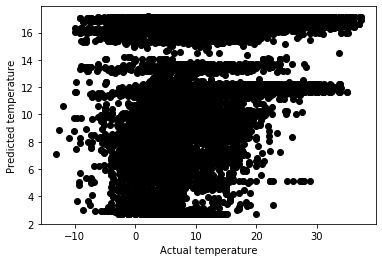

MSE : 64.76742909841282
Error : 64.7674290984127
The mean absolute error:  6.498840791843139


'\nWe can see that the mean absolute error values have largely increased compared to the previous scenario, \nwhich can be due to the unsuitability of features as strong predictors for temperature. \nPressure is a weak predictor for temperature\n'

In [110]:


#Assigning pressure as the response variable
y = df_train['pressure']

#Assigning the possible predictor variables to x
feature = ['precip_type', 'humidity', 'wind_speed','wind_bearing','visibility', 'cloud_cover', 'temperature', 'apparent_temperature']
x = df_train[feature]

#Calculating the pearson correlation of each predictor variable and the response variable
print('Pearson correlation between precipitation type and pressure', stats.pearsonr(x['precip_type'],y))
print('Pearson correlation between humidity and pressure', stats.pearsonr(x['humidity'],y))
print('Pearson correlation between wind speed and pressure', stats.pearsonr(x['wind_speed'],y))
print('Pearson correlation between wind bearing and pressure', stats.pearsonr(x['wind_bearing'],y))
print('Pearson correlation between visibility and pressure', stats.pearsonr(x['visibility'],y))
print('Pearson correlation between cloud cover and pressure', stats.pearsonr(x['cloud_cover'],y))
print('Pearson correlation between Temperature and pressure', stats.pearsonr(x['temperature'],y))
print('Pearson correlation between apparent temperature and pressure', stats.pearsonr(x['apparent_temperature'],y))


'''
from the pearson correlation in overall none of the variables that have strog relationship with pressure. 
Among all visibility has highest score for correlation among all variables
Therefore we consider visibility as the significant feature in predicting pressure

'''

#Assigning pressure and visibility as the features for predicting temperature
features = ['pressure', 'visibility']
x = df_train[features]

y = df_train['temperature']

#Defining the linear regression model
my_model = LR(normalize = True)
my_model.fit(x,y)




print('____MSE for prediction using train data______')

pred_y = my_model.predict(x)

mse = np.mean((pred_y - y)**2)
print('MSE : {}'.format(mse))

error = skm.mean_squared_error(y,pred_y)
print('Error : {}'.format(error))

print('The mean absolute error: ',mean_absolute_error(y,pred_y))


print('____MSE for prediction using test data______')

y_test = df_test['temperature']
x_test = df_test[features]

prediction = my_model.predict(x_test)

plt.plot(y_test,prediction,'ok')
plt.ylabel('Predicted temperature')
plt.xlabel('Actual temperature')
plt.show()

mse = np.mean((prediction - y_test)**2)
print('MSE : {}'.format(mse))

error = skm.mean_squared_error(y_test,prediction)
print('Error : {}'.format(error))

print('The mean absolute error: ',mean_absolute_error(y_test,prediction))


'''
We can see that the mean absolute error values have largely increased compared to the previous scenario, 
which can be due to the unsuitability of features as strong predictors for temperature. 
Pressure is a weak predictor for temperature
'''

5. Apportion the complete dataset into training and test sets, with an 40-60 split. **(6 marks)**

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 
  
  (b) Create an optimal regularised linear regression model and report the test performance.
  
  (c) Explain the reason behind the performance variation, if any.


In [111]:
#Reference: https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np



#a) Training a linear regression model and reporting the test performance

labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df_weather['precip_type'] = labelencoder.fit_transform(df_weather['precip_type'])


dtrain,dtest = train_test_split(df_weather, test_size = 0.60, random_state=42)

print(dtrain.shape)
print(dtest.shape)


my_model = LR(normalize = True)
features = ['precip_type', 'humidity', 'apparent_temperature']

#Defining x_train and y_train
x_train = dtrain[features]
y_train = dtrain['temperature']

#defining x_test and y_test
x_test = dtest[features]
y_test = dtest['temperature'].values

#model fitting 
my_model.fit(x_train, y_train)

#Prediction using the linear regression model

pred_test = my_model.predict(x_test)


#Finding the mean square error of the model prediction
mse=np.mean((pred_test-y_test)**2)
print('The mean absolute error value: ',mse)

#Finding the mean absolute error
print('The mean absolute error: ',mean_absolute_error(y_test,pred_test))

print('_________________part b__________________')

#b)creating an optimised linear regressional model


#Hyperparameter tuning for Lasso optimised model using gridsearch method
#I have used different values of alpha and tolerance levels. 

alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001])
tol = np.array([0.1,0.001, 0.01, 0.0001, 0.02])

lassoreg=Lasso(alpha=0.0001,normalize=True, max_iter=1e5,tol=0.0001)

grid = GridSearchCV(estimator=lassoreg, param_grid=dict(alpha=alphas, tol = tol), scoring = 'neg_mean_absolute_error')

grid.fit(x_train, y_train)

print(grid.best_estimator_.alpha) #0.0005
print(grid.best_estimator_.tol)#0.0001
print(grid.best_score_)


#Fitting the best hyperparameters on Lasso 

lassoreg=Lasso(alpha=0.0005,normalize=True, max_iter=1e5, tol=0.0001)
lassoreg.fit(x_train, y_train)


#Prediction using the linear regression model

pred_test_lassoreg = lassoreg.predict(x_test)

#Finding the mean square error of the model prediction
mse=np.mean((pred_test_lassoreg-y_test)**2)
print('The mean absolute error value: ',mse)
#Finding the mean absolute error
print('The mean absolute error: ',mean_absolute_error(y_test,pred_test_lassoreg))


'''
There is no change in mean absolute error after optimising the linear regression model(Lasso). 

Therefore it proves that there is no room for any overfitting of the model. 


'''


(38581, 10)
(57872, 10)
The mean absolute error value:  1.1722656820669037
The mean absolute error:  0.828153578084607
_________________part b__________________
0.0005
0.0001
-0.82175272533844
The mean absolute error value:  1.1835967050229537
The mean absolute error:  0.8259711289878146


'\nThere is no change in mean absolute error after optimising the linear regression model. \n\nTherefore it proves that there is no room for any overfitting of the data. \n\n\n'

##**Part 2: Logistic Regression:**  **(9 marks)**


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why? **(2 marks)**

In [112]:
'''
Temperature cannot be used as the target variable for logistic regression becuase, logistic 
regression uses a logistic function to model a binary dependent variable.

Since temperature is a numeric continuous variable it cannot be used there. 

Variables like precipitation type is binary (snow/rain) which is suitable for logistic regression

'''

'\nTemperature cannot be used as the target variable for logistic regression becuase, logistic \nregression uses a logistic function to model a binary dependent variable.\n\nSince temperature is a numeric continuous variable it cannot be used there. \n\nVariables like precipitation type is binary (snow/rain) which is suitable for logistic regression\n\n'

2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45). **(5 marks)**



In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


dtrain,dtest = train_test_split(df_weather, test_size = 0.30)

print(dtrain.shape)
print(dtest.shape)

#Define the x_train and y_train
y_train = dtrain['precip_type']

print(y_train.unique())

features_lr = ['temperature', 'apparent_temperature','humidity','wind_speed','wind_bearing','visibility','cloud_cover','pressure']
x_train = dtrain[features_lr]

#Define x_test and y_test

y_test = dtest['precip_type']
x_test = dtest[features_lr]


#Initialise logistic regression model. 
lambda_val=0.1
#Initialize the Logitic regression model with l2 penalty
lr=LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(x_train, y_train)

#Prediction with logistic regression model
threshold = 0.45
y_predict = np.where(lr.predict_proba(x_test)[:,1] > 0.45, 1, 0)
                     
                     
model_acc=accuracy_score(y_predict, y_test)
print("Model Accuracy is:{}".format(model_acc))
print("Model Coeff:{}".format(np.append(lr.intercept_, lr.coef_)))


(67517, 10)
(28936, 10)
Model Accuracy is:0.9854160906828864
Model Coeff:[ 3.00043509e-03 -1.14668897e+00  2.71821186e-01 -1.12677805e-01
  7.08289211e-02 -2.32225311e-04 -3.12715099e-02  0.00000000e+00
  4.15710350e-04]


 3.  Discuss the test performance using precision, recall and confusion matrix. **(2 marks)**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25512
           1       0.94      0.93      0.94      3424

    accuracy                           0.99     28936
   macro avg       0.97      0.96      0.96     28936
weighted avg       0.99      0.99      0.99     28936

[[25316   196]
 [  226  3198]]


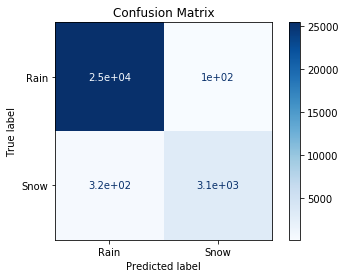

'\n\nRecall the number of True Positives divided by the number of True Positives and the number of False Negatives. \nPrecision is the number of True Positives divided by the number of True Positives and False Positives.\nThe F1 Score is the 2*((precision*recall)/(precision+recall)). It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall.\n\n\nIn our task, the weighted average of precision, recall and f1 score are 0.98, that is higher they are better the model performance will be.\n\nAnd all the above paramters are measures based of test dataset\n\n'

In [117]:
#Classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(classification_report(y_predict, y_test))

print(confusion_matrix(y_predict, y_test))


class_names = ["Rain", "Snow"]
 

display = plot_confusion_matrix(lr, x_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues)
display.ax_.set_title("Confusion Matrix")
plt.show()

'''

Recall the number of True Positives divided by the number of True Positives and the number of False Negatives. 
Precision is the number of True Positives divided by the number of True Positives and False Positives.
The F1 Score is the 2*((precision*recall)/(precision+recall)). It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall.


In our task, the weighted average of precision, recall and f1 score are 0.99, that is higher they are better the model performance will be.

And all the above paramters are measures based of test dataset

'''

##**Part 3: Objective function optimisation:**  **(6 marks)**

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

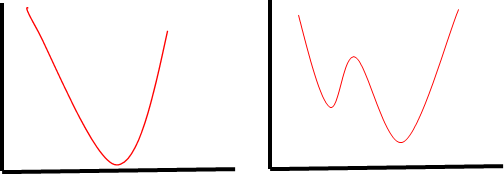





a.  Which of the above figures represents the convex objective function and why? (**1 marks**)

b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection? (**2 marks**)

c.  How can we find the global minima for the objective function shown in Figure-b? _[N.B. Conceptual description will be accepted.]_ (**3 marks**)

In [ ]:
'''
1. The figure (a) represents the convex objective function because it has a global minimum which is easy to identify

2. The learning rate is a hyperparameter which defines how quickly a network updates its parameters.
Low learning rate slows down the learning process but converges smoothly. Larger learning rate speeds up the learning 
but may not converge.Usually a decaying Learning rate is preferred. 

3. 

The central problem of optimization is minimization of functions. 
Gradient descent is an efficient optimization algorithm that attempts to find a local or global minimum of the cost function.

The lowest point in the entire graph is the global minimum, which is what stochastic gradient descent attempts to find. 
Stochastic gradient descent attempts to find the global minimum by adjusting the configuration of the network after each training point.
Instead of decreasing the error, or finding the gradient,  for the entire data set, this method merely decreases the error by approximating the gradient for a randomly selected batch.

Other methods like Newtons method and saddle free newton's method can be used to find the global minima. 



Reference: https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a
http://web.cs.iastate.edu/~cs577/handouts/nonlinear-program.pdf
https://towardsdatascience.com/minimizing-the-cost-function-gradient-descent-a5dd6b5350e1
https://www.cs.ubc.ca/labs/lci/mlrg/slides/non_convex_optimization.pdf
http://www.math.ubc.ca/~CLP/CLP1/clp_1_dc/ssec_find_maxmin.html
https://deepai.org/machine-learning-glossary-and-terms/stochastic-gradient-descent#:~:text=The%20lowest%20point%20in%20the,network%20after%20each%20training%20point.

'''